In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import logging as log

In [3]:
# permet de mélanger deux matrice à  l'unisson
# link https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison

def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [11]:
# 2.Implementation du perceptron
# on initialise w

#max_iter int, default=1000   

#tol float, default=1e-3
#The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).

# verbose int, default=0
#The verbosity level
#eta: learning rate
#eta double, default=1
#Constant by which the updates are multiplied.


class MyPerceptron:
   # def __init__(self, data = None):
    def __init__ ( self, epochs=1000, eta=1, verbose=0, weight0=0):
        self.epochs = epochs
        self.eta = eta
        self.verbose= verbose
        self.weight0 = weight0
        # initializing verbose mode
        if (self.verbose!=0 ):
            log.basicConfig(format="%(levelname)s: %(message)s", level=log.DEBUG)
            log.info("Verbose output.")
        else:
            log.basicConfig(format="%(levelname)s: %(message)s")
            # somme log messages examples 
            #log.info("This should be verbose.")
            #log.warning("This is a warning.")
            #log.error("This is an error.")
        
    # function for training data set
    def train(self,X,Y):
    #fill weight vector withe the initial 
        weight =  np.full(len(X[0]), self.weight0)    
        for t in range(self.epochs):
            log.info("t : ",t)
            for i,x in enumerate(X):
                z = np.dot(X[i], weight)
                if z*Y[i]<=0:
                    log.info('i: ',i,', z*Y[i]: ',z*Y[i])
                    weight = weight+ self.eta*X[i]*(Y[i])
        log.info('weight: ',weight)        
        return weight        
            
#X et Y 

#poids = np.zeros((3))
#eps=1

#for t in range(epochs):
 #   print(t)
  #  for i,x in enumerate(X):
#        z = np.dot(X[i], poids)
#        if z*Y[i]<=0:
#                poids = poids+ eps*X[i]*(Y[i])



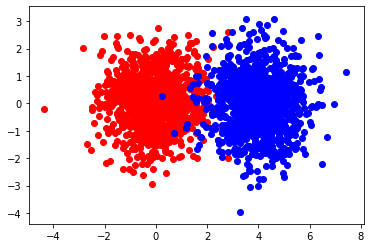

In [12]:
# TP 1 exercice 2


# 1. 1. Générer deux groupes de données (de N éléments chacun) suivant une distribution gaussienne en
# 2D. Chaque groupe aura une variance de 1 mais nous nous réservons le droit de changer la distance

N = 1000
d=4
x1 = np.random.randn(N,3) 
x1[:,2]=1
x2 =  np.random.randn(N,3)
x2[:,0]+=d
x2[:,2]=1

# shows x1 and x2
plt.scatter(x1[:,0],x1[:,1],c="r")
plt.scatter(x2[:,0],x2[:,1],c="b")


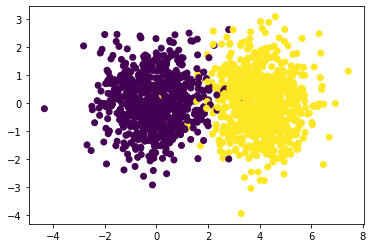

In [13]:
# séparation des données d'entrainement et de test
X = np.concatenate((x1,x2), axis=0)
Y = np.array([-1]*N + [1]*N)
X,Y = shuffle_in_unison(X,Y)

# splitting the data into train/test sets
train_X = X[0:int(0.7*(N *2))]
train_Y = Y[0:int(0.7*(N *2))]

test_X = X[int(0.7*(N *2)):(N *2)]
test_Y = Y[int(0.7*(N *2)):(N *2)]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# shows x1 and x2
#print(X_train)
#print(Y_train)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
#plt.scatter(x2[:,0],x2[:,1],c="b")

In [14]:
percept = MyPerceptron()
w = percept.train(X_train,Y_train)
print(w) 

[  8.77046      1.34033666 -13.        ]


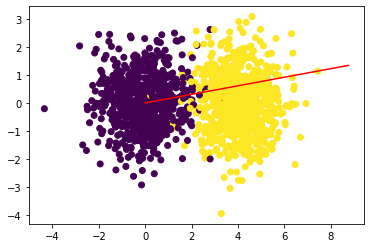

In [22]:


plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
#print("X1 : ",x1,"\r\n X2 : ",x_2)
plt.plot([0,w[0]], [0,w[1]],c="red")

In [ ]:
# todo extraire 10 points bleus et 10 points rouges pour la base de test
  # shuffling the data to make the sampling random
    np.random.shuffle(dataset)

    # splitting the data into train/test sets
    train = dataset[0:int(0.7*(obs*2))]
    test = dataset[int(0.7*(obs*2)):(obs*2)]

In [ ]:
#4 

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

N = 1000
d=4

x1 = np.random.randn(N,3) 
x1[:,2]=1

np.random.seed(555)
t = np.linspace(0,2*np.pi,100)
xc = 0 #x-coordinate of center of circle 
yc = 0 #y-coordinate of center of circle
r = 2*np.random.rand() +5 #radius of circle

x2 = r*np.cos(t) + np.random.normal(scale = 1.0/7, size = len(t)) + xc  
y2 = r*np.sin(t) + np.random.normal(scale = 1.0/7, size = len(t)) + yc



x2 =  np.random.randn(N,3)
x2[:,0]+=np.sqrt(x**2 + y**2)d
x2[:,2]=1

# shows x1 and x2
plt.scatter(x1[:,0],x1[:,1],c="r")
plt.scatter(x2[:,0],x2[:,1],c="b")

X = np.concatenate((x1,x2), axis=0)
Y = np.array([-1]*N + [1]*N)


r = np.sqrt(x**2+y**2)
t = np.arctan2(y,x)


In [ ]:
#other   
def perceptron_sgd(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 20
    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                w = w + eta*X[i]*Y[i]
    return w

    

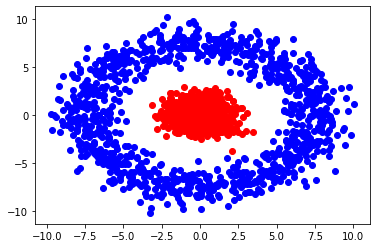

In [20]:

np.random.seed(555)
n=1000
t = np.linspace(0,2*np.pi,n)
const_array = np.ones((n,1))
#print(const_array)
xc = 0 #3*np.random.rand() #x-coordinate of center of circle 
yc = 0 #3*np.random.rand() #y-coordinate of center of circle
r = (10+5)/2 #  5 + 5*np.random.rand() #+ 0.1 #radius of circle
r1 = 0
#print(r)
x = r*np.cos(t) + np.random.normal(scale = 1.0, size = len(t)) + xc  
y = r*np.sin(t) + np.random.normal(scale = 1.0, size = len(t)) + yc


x2 =  np.random.randn(n,3)
x2[:,0]=x
x2[:,1]=y
x2[:,2]=1

r = 0
x = r*np.cos(t) + np.random.normal(scale = 1.0, size = len(t)) + xc  
y = r*np.sin(t) + np.random.normal(scale = 1.0, size = len(t)) + yc

x1 =  np.random.randn(n,3)
x1[:,0]=x
x1[:,1]=y
x1[:,2]=1

# shows x1 and x2
plt.scatter(x1[:,0],x1[:,1],c="r")
plt.scatter(x2[:,0],x2[:,1],c="b")

X = np.concatenate((x1,x2), axis=0)
Y = np.array([-1]*n + [1]*n)

In [28]:
# augmentation de la dimension
XDIM = X
XDIM[:,2]=np.add(X[:0], X[:0])
print(XDIM)

ValueError: shapes (0,3) and (0,3) not aligned: 3 (dim 1) != 0 (dim 0)